In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration

In [3]:
df = pd.read_excel("C:/Users/souna/OneDrive/Desktop/Projects/Customer Segmentation Analysis/customer_online_retail_data.xlsx", sheet_name=0)


In [4]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2022-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2022-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2022-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2022-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2022-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2022-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2022-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2022-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2022-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2022-12-01 07:46:00,3.75,13085.00,United Kingdom


In [5]:
df.shape

(525461, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2023-06-28 11:37:36.845017600,4.69,15360.65
min,-9600.00,2022-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2023-03-21 12:20:00,1.25,13983.00
50%,3.00,2023-07-06 09:51:00,2.10,15311.00
75%,10.00,2023-10-15 12:45:00,4.21,16799.00
max,19152.00,2023-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [8]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [9]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2022-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2022-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2022-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2022-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2022-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2022-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2022-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2022-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2022-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2022-12-01 12:32:00,1.65,NaN,United Kingdom


In [10]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2022-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2022-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2022-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2022-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2022-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2022-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2022-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2022-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2022-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2022-12-01 10:44:00,4.25,17592.00,United Kingdom


#### Variable Information
Invoice number: A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation. 

In [11]:
#Finding which records have C in their Invoice number
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2022-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2022-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2022-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2022-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2022-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2023-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2023-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2023-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2023-12-09 15:43:00,12.75,15329.00,United Kingdom


In [12]:
#Finding if any other character like C in any record in Invoice number
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [13]:
df[df.Invoice.str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2023-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2023-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2023-10-20 12:04:00,-38925.87,NaN,United Kingdom


#### Variable Information
StockCode: A 5-digit integral number uniquely assigned to each distinct product. 

In [14]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [15]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2022-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2022-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2022-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2022-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2022-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2023-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2023-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2023-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2023-12-09 16:31:00,822.94,NaN,United Kingdom


In [16]:
df[df["StockCode"].str.contains("^DCGS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2022-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2022-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2022-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2022-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2022-12-03 14:39:00,16.48,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
466308,533348,DCGSSBOY,BOYS PARTY BAG,1,2023-11-17 09:23:00,3.36,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2023-11-22 11:25:00,2.51,NaN,United Kingdom
496962,535835,DCGSSBOY,BOYS PARTY BAG,3,2023-11-29 09:46:00,3.36,NaN,United Kingdom
496963,535835,DCGSSGIRL,GIRLS PARTY BAG,3,2023-11-29 09:46:00,3.36,NaN,United Kingdom


In [17]:
df[df["StockCode"].str.contains("^POST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2022-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2022-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2022-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2022-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2022-12-01 12:18:00,9.58,15796.00,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2023-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2023-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2023-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2023-12-09 12:17:00,18.00,12683.00,France


In [18]:
df[df["StockCode"].str.contains("^D")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2022-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2022-12-01 12:11:00,19.00,15299.00,United Kingdom
2377,489597,DCGS0058,MISO PRETTY GUM,1,2022-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2022-12-01 14:28:00,8.65,NaN,United Kingdom
2379,489597,DOT,DOTCOM POSTAGE,1,2022-12-01 14:28:00,647.19,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2023-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2023-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2023-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2023-12-09 16:31:00,822.94,NaN,United Kingdom


In [19]:
df[df["StockCode"].str.contains("^M")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2022-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2022-12-01 16:48:00,5.10,17804.00,United Kingdom
5897,C489859,M,Manual,-1,2022-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2022-12-03 18:12:00,5.95,15884.00,United Kingdom
9307,C490129,M,Manual,-1,2022-12-03 18:26:00,1998.49,15482.00,United Kingdom
...,...,...,...,...,...,...,...,...
521074,537800,M,Manual,12,2023-12-08 13:08:00,0.19,12748.00,United Kingdom
521122,537804,M,Manual,12,2023-12-08 13:17:00,2.95,12748.00,United Kingdom
521124,537804,M,Manual,12,2023-12-08 13:17:00,0.19,12748.00,United Kingdom
524696,C538124,M,Manual,-4,2023-12-09 15:43:00,0.50,15329.00,United Kingdom


In [20]:
df[df["StockCode"].str.contains("^C2")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2022-12-03 18:13:00,50.00,14156.00,EIRE
14481,490541,C2,CARRIAGE,1,2022-12-07 09:25:00,50.00,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2022-12-07 09:42:00,50.00,14911.00,EIRE
19541,490998,C2,CARRIAGE,1,2022-12-08 17:24:00,50.00,16253.00,United Kingdom
22803,491160,C2,CARRIAGE,1,2022-12-10 10:29:00,50.00,14911.00,EIRE
...,...,...,...,...,...,...,...,...
504361,536540,C2,CARRIAGE,1,2023-12-01 14:05:00,50.00,14911.00,EIRE
515057,537368,C2,CARRIAGE,1,2023-12-06 12:40:00,50.00,14911.00,EIRE
515390,537378,C2,CARRIAGE,1,2023-12-06 13:06:00,50.00,14911.00,EIRE
522913,537963,C2,CARRIAGE,1,2023-12-09 11:30:00,50.00,13369.00,United Kingdom


In [21]:
df[df["StockCode"].str.contains("^C3")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
302041,518785,C3,NaN,-4999,2023-08-11 16:55:00,0.00,NaN,United Kingdom


In [22]:
df[df["StockCode"].str.contains("^B")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2022-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2022-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2022-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2023-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2023-02-17 15:03:00,15.00,16928.00,United Kingdom
...,...,...,...,...,...,...,...,...
450634,C532203,BANK CHARGES,Bank Charges,-1,2023-11-11 12:31:00,15.00,NaN,United Kingdom
455268,532637,BANK CHARGES,Bank Charges,1,2023-11-12 16:18:00,15.00,13174.00,United Kingdom
493162,535474,BANK CHARGES,Bank Charges,1,2023-11-26 13:56:00,15.00,16928.00,United Kingdom
507344,536779,BANK CHARGES,Bank Charges,1,2023-12-02 15:08:00,15.00,15823.00,United Kingdom


In [23]:
df[df["StockCode"].str.contains("^S")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2023-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2023-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2023-03-22 15:50:00,170.37,NaN,United Kingdom
133582,C502088,S,SAMPLES,-1,2023-03-22 16:03:00,259.59,NaN,United Kingdom
136253,C502438,S,SAMPLES,-1,2023-03-24 13:11:00,605.18,NaN,United Kingdom


In [24]:
df[df["StockCode"].str.contains("^TEST")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2022-12-14 08:34:00,4.50,12346.00,United Kingdom
28251,491742,TEST001,This is a test product.,5,2022-12-14 11:00:00,4.50,12346.00,United Kingdom
28254,491744,TEST001,This is a test product.,5,2022-12-14 11:02:00,4.50,12346.00,United Kingdom
39398,492718,TEST001,This is a test product.,5,2022-12-18 10:47:00,4.50,12346.00,United Kingdom
39411,492722,TEST002,This is a test product.,1,2022-12-18 10:55:00,1.00,12346.00,United Kingdom


In [25]:
df[df["StockCode"].str.contains("^gift")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30620,491968,gift_0001_80,NaN,2,2022-12-14 17:56:00,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2022-12-14 17:57:00,69.56,NaN,United Kingdom
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2022-12-14 18:37:00,17.39,NaN,United Kingdom
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2022-12-18 17:06:00,8.69,NaN,United Kingdom
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2022-12-18 17:06:00,17.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
399538,527520,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2023-10-18 13:18:00,25.53,NaN,United Kingdom
407443,528382,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2023-10-21 18:01:00,34.04,NaN,United Kingdom
434320,530850,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2023-11-04 14:49:00,25.53,NaN,United Kingdom
442201,531489,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2023-11-08 15:02:00,8.51,NaN,United Kingdom


In [26]:
df[df["StockCode"].str.contains("^PADS")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2023-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2023-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2023-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2023-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2023-02-15 10:47:00,0.00,13408.00,United Kingdom


In [27]:
df[df["StockCode"].str.contains("^SP1002")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2023-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2023-10-07 12:23:00,2.95,17841.00,United Kingdom
426694,530135,SP1002,NaN,-27,2023-11-01 15:33:00,0.00,NaN,United Kingdom


In [28]:
df[df["StockCode"].str.contains("^AMAZONFEE")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2023-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2023-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2023-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2023-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2023-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2023-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2023-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2023-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2023-12-07 15:51:00,6706.71,NaN,United Kingdom


In [29]:
df[df["StockCode"].str.contains("^ADJUST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2023-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2023-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2023-01-26 16:22:00,201.56,12745.00,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2023-01-26 16:22:00,205.82,14911.00,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2023-01-26 16:23:00,10.50,16154.00,United Kingdom
...,...,...,...,...,...,...,...,...
208670,C509474,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2023-05-24 11:13:00,72.45,16422.00,United Kingdom
208671,C509475,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2023-05-24 11:13:00,358.47,17364.00,United Kingdom
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2023-06-25 14:15:00,300.13,17050.00,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2023-06-25 14:15:00,358.47,17364.00,United Kingdom


### Note
- StockCode is meant to follow the pattern [0-9]{5} but seems to have legit values for [0-9]{5}[a-zA-Z]+
- Also contains other values:

| StockCode | Description | Action |
|-----------|-----------|-----------|
| DCGS | Looks valid, some quantities are negative though and customer ID is null | Exclude from clustering |
| D | Looks valid, represents discount values | Exclude from clustering |
| DOT | Looks valid, represents postage charges | Exclude from clustering |
| M or m | Looks valid, represents manual transactions | Exclude from clustering |
| C2 | Carriage transaction | Exclude from clustering |
| C3 | Only 1 transaction | Exclude |
| BANK CHARGES or B | Bank Charges | Exclude from clustering |
| S | Samples sent to customer | Exclude from clustering |
| TESTXXXX | Testing data | Exclude from clustering |
| gift__XXX | Purchases with gift cards, but no customer data | Exclude |
| PADS | Legit stock code for padding | Include |
| SP1002 | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing | Exclude for now |
| AMAZONFEE |Looks like fees for Amazon shipping | Exclude for now |
| ADJUSTX | Looks like manual account adjustments by admins | Exclude for now |


## Data Cleaning

In [30]:
df_clean = df.copy()

In [31]:
#Removing records with C (Cancellation) and A (Accounting) in Invoice number
df_clean["Invoice"] = df_clean["Invoice"].astype("str")

df_clean = df_clean[df_clean["Invoice"].str.match("^\\d{6}$") == True]

df_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2022-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2022-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2022-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2022-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2022-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2023-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2023-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2023-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2023-12-09 20:01:00,3.75,17530.00,United Kingdom


In [32]:
df_clean["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array([''], dtype=object)

In [33]:
#Cleaning for StockCode
df_clean["StockCode"] = df_clean["StockCode"].astype("str")

mask = (
    (df_clean["StockCode"].str.match("^\\d{5}$") == True)
    | (df_clean["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (df_clean["StockCode"].str.match("^PADS$") == True)
)

df_clean = df_clean[mask]

df_clean

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2022-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2022-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2022-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2022-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2022-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2023-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2023-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2023-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2023-12-09 20:01:00,3.75,17530.00,United Kingdom


In [34]:
#Dropping Null Customers
df_clean.dropna(subset=["Customer ID"], inplace=True)

C:\Users\souna\AppData\Local\Temp\ipykernel_19008\255271791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(subset=["Customer ID"], inplace=True)


In [35]:
df_clean.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2023-07-01 10:11:06.543287552,2.99,15373.63
min,1.00,2022-12-01 07:45:00,0.00,12346.00
25%,2.00,2023-03-26 14:01:00,1.25,14004.00
50%,5.00,2023-07-09 15:48:00,1.95,15326.00
75%,12.00,2023-10-14 17:09:00,3.75,16814.00
max,19152.00,2023-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [36]:
len(df_clean[df_clean["Price"] == 0])

28

In [37]:
#Removing records where Price is 0
df_clean = df_clean[df_clean["Price"] > 0.0]

In [38]:
len(df_clean[df_clean["Price"] == 0])

0

In [39]:
len(df_clean)/len(df)*100

77.32429238325965

Dropped about 23 % of records during cleaning.

## Feature Engineering

In [41]:
df_clean["TotalSales"] = df_clean["Quantity"] * df_clean["Price"]
df_clean

C:\Users\souna\AppData\Local\Temp\ipykernel_19008\2012391200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["TotalSales"] = df_clean["Quantity"] * df_clean["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2022-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2022-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2022-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2022-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2022-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2023-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2023-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2023-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2023-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [43]:
agg_df = df_clean.groupby(by="Customer ID", as_index=False).agg(
    MonetaryValue = ("TotalSales", "sum"), #Total money spent by a customer (M)
    Frequency = ("Invoice", "nunique"), #How often the customer made a purchase (F)
    LastInvoiceDate = ("InvoiceDate", "max") #The most recent purchase date
)

agg_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2023-06-28 13:53:00
1,12347.00,1323.32,2,2023-12-07 14:57:00
2,12348.00,221.16,1,2023-09-27 14:59:00
3,12349.00,2221.14,2,2023-10-28 08:23:00
4,12351.00,300.93,1,2023-11-29 15:23:00


In [46]:
#Computing Recency (R)
latest_date = df_clean['InvoiceDate'].max()
agg_df["Recency"] = (latest_date - agg_df["LastInvoiceDate"]).dt.days

agg_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2023-06-28 13:53:00,164
1,12347.00,1323.32,2,2023-12-07 14:57:00,2
2,12348.00,221.16,1,2023-09-27 14:59:00,73
3,12349.00,2221.14,2,2023-10-28 08:23:00,42
4,12351.00,300.93,1,2023-11-29 15:23:00,10


#### Visualizing the Distribution of Recency, Frequency, and Monetary Value

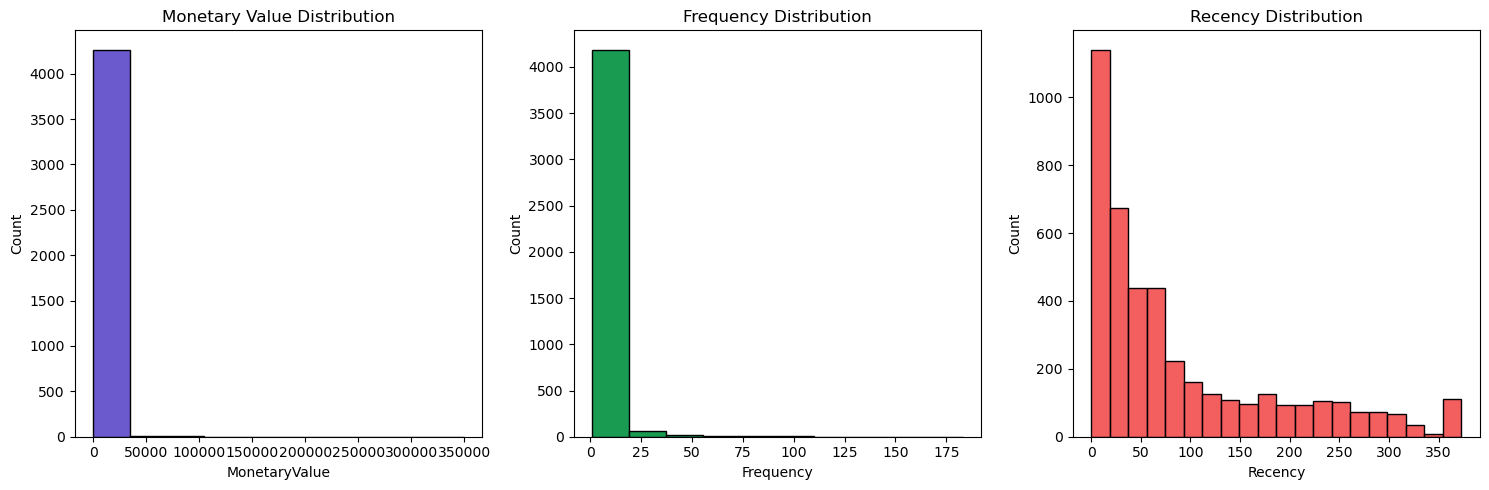

In [65]:
features = ['MonetaryValue', 'Frequency', 'Recency']
titles = ['Monetary Value Distribution', 'Frequency Distribution', 'Recency Distribution']
colors = ['#6A5ACD', "#1A9B52", "#F13636CC"]
bins = [10, 10, 20]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, feature, title, color, b in zip(axes, features, titles, colors, bins):
    agg_df[feature].plot(kind='hist', bins=b, color=color, edgecolor='black', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


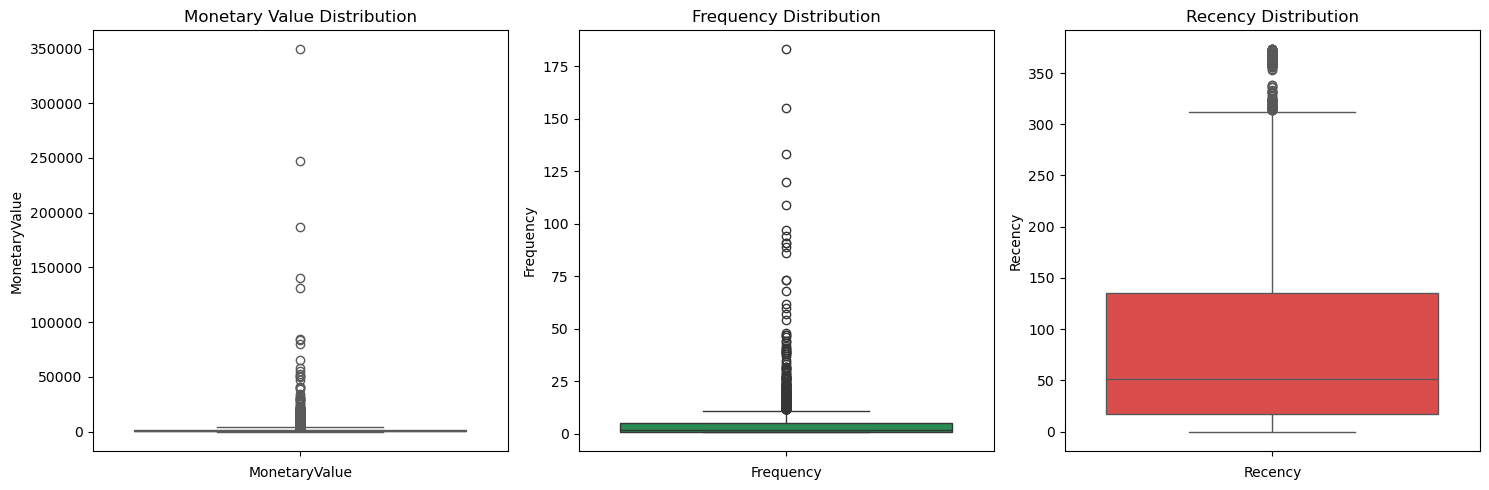

In [64]:
features = ['MonetaryValue', 'Frequency', 'Recency']
titles = ['Monetary Value Distribution', 'Frequency Distribution', 'Recency Distribution']
colors = ['#6A5ACD', "#1A9B52", "#F13636CC"]

fig, axes = plt.subplots(1,3, figsize=(15,5))

for ax, feature, title, color in zip(axes, features, titles, colors):
    sns.boxplot(data=agg_df[feature], color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

#### Outlier Detection using IQR (Interquartile Range)

In [72]:
M_Q1 = agg_df["MonetaryValue"].quantile(0.25)  #Q1 (25th percentile). The value below which 25% of data falls.
M_Q3 = agg_df["MonetaryValue"].quantile(0.75)  #Q3 (75th percentile). The value below which 75% of data falls.
M_IQR = M_Q3 - M_Q1 #Interuartile Range. Measures the spread of the middle 50% of the data.

#Filtering for outliers
monetary_outliers_df = agg_df[
    (agg_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) |  #Upper outliers. Values much higher than the typical range
    (agg_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))    #Lower outliers
].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2023-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2022-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2023-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2023-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2023-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2023-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [73]:
F_Q1 = agg_df["Frequency"].quantile(0.25)  
F_Q3 = agg_df["Frequency"].quantile(0.75)  
F_IQR = F_Q3 - F_Q1 

frequency_outliers_df = agg_df[
    (agg_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) |  
    (agg_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))  
].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2023-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2023-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2023-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2023-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2023-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2023-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [74]:
#Outlier removal across multiple RFM features

non_outliers_df = agg_df[
    (~agg_df.index.isin(monetary_outliers_df.index)) &
    (~agg_df.index.isin(frequency_outliers_df.index))
]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2023-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2022-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2023-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2023-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2023-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2023-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


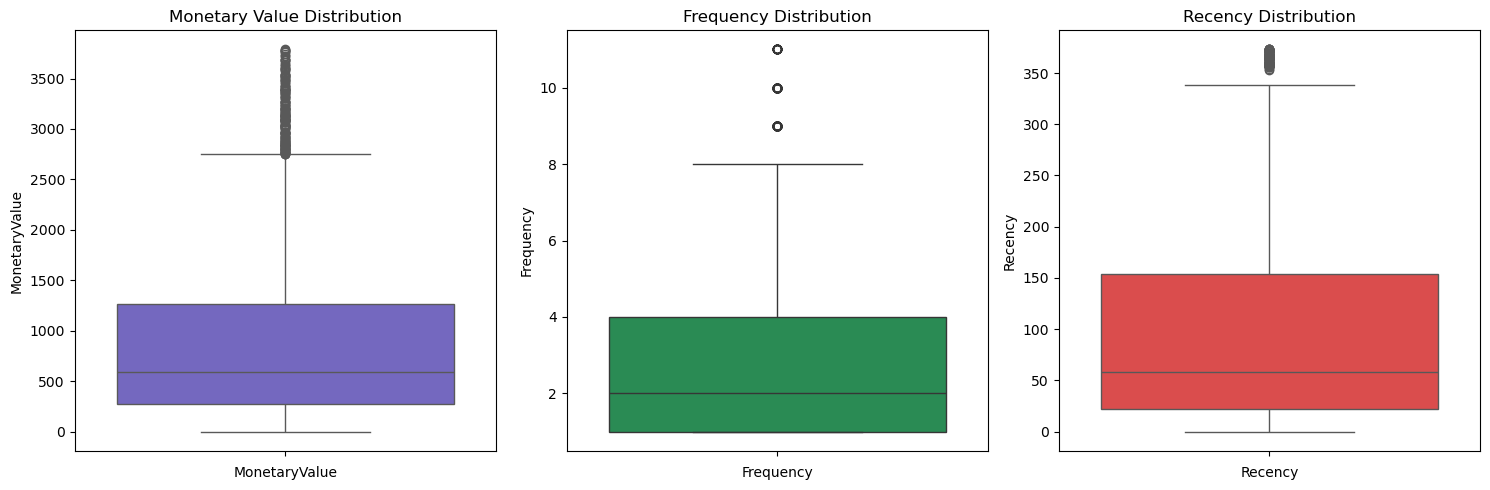

In [77]:
features = ['MonetaryValue', 'Frequency', 'Recency']
titles = ['Monetary Value Distribution', 'Frequency Distribution', 'Recency Distribution']
colors = ['#6A5ACD', "#1A9B52", "#F13636CC"]

fig, axes = plt.subplots(1,3, figsize=(15,5))

for ax, feature, title, color in zip(axes, features, titles, colors):
    sns.boxplot(data=non_outliers_df[feature], color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()

#### 3D Scatter Plot of Customer Data

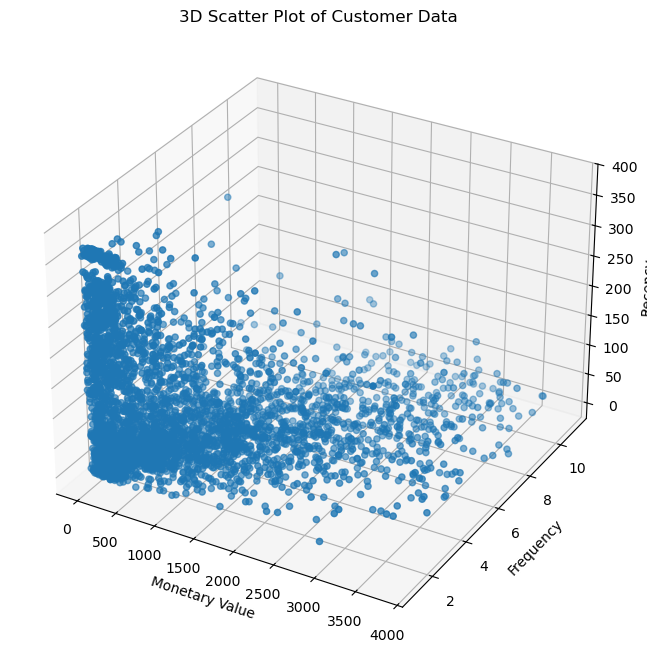

In [88]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

#### Standard Scaling (Z-score normalization)

In [90]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [91]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=('MonetaryValue', 'Frequency', 'Recency'))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


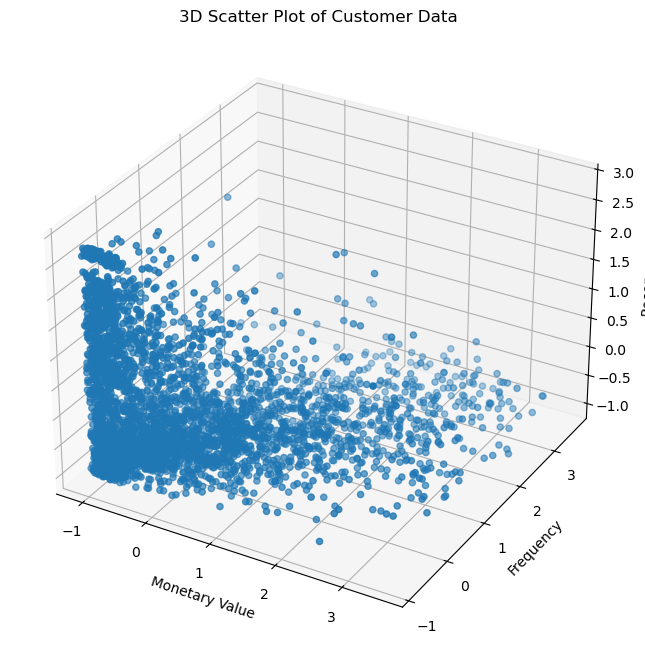

In [92]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection = "3d")
scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()